# Sesión 1 – Introducción al Análisis Predictivo
### Exploración inicial de datos con Python

En esta primera sesión trabajaremos con un conjunto de datos sintéticos para:
- Explorar tipos de variables (numéricas y categóricas).
- Visualizar distribuciones simples.
- Comprender cómo el análisis descriptivo prepara el camino para la predicción.


In [450]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [451]:

df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE


### Paso 3: Revisar estructura del dataset

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      512 non-null    int64 
 1   Fecha_Ocurrencia        512 non-null    object
 2   Codigo_Accidente        512 non-null    object
 3   Direccion               512 non-null    object
 4   Barrio                  512 non-null    object
 5   Vehiculos_Involucrados  512 non-null    int64 
 6   Heridos                 512 non-null    int64 
 7   Accidente _con          512 non-null    object
 8   Heridos _SI/NO          512 non-null    int64 
 9   Muertes                 512 non-null    object
 10  Clase_Accidente         512 non-null    object
dtypes: int64(4), object(7)
memory usage: 44.1+ KB


### Paso 4: Descripción estadística general

In [453]:
df.describe(include='all')

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
count,512.000000,512,512,512,512,512.000000,512.000000,512,512.000000,512,512
unique,NaN,412,509,503,51,NaN,NaN,3,NaN,5,4
top,NaN,12/14/2024 0:00,A001371905,CALLE 13 CARRERA 16 CENTRO,No registra,NaN,NaN,HERIDOS,NaN,NO APLICA,CHOQUE
freq,NaN,3,2,2,201,NaN,NaN,412,NaN,453,450
mean,256.500000,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.804688,NaN,NaN
std,147.945936,NaN,NaN,NaN,NaN,0.471707,0.914419,NaN,0.396829,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,128.750000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
50%,256.500000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
75%,384.250000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1:CANTIDAD DE ACCIDENTES POR MES 

In [454]:
#1.GRAFICA 
# Asegurarse de que la columna de fechas esté en formato datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')


*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

In [455]:
# Crear una columna para el mes y año
df['Mes_Año'] = df['Fecha_Ocurrencia'].dt.to_period('M')

In [456]:
# Contar accidentes por mes
accidentes_por_mes = df['Mes_Año'].value_counts().sort_index()

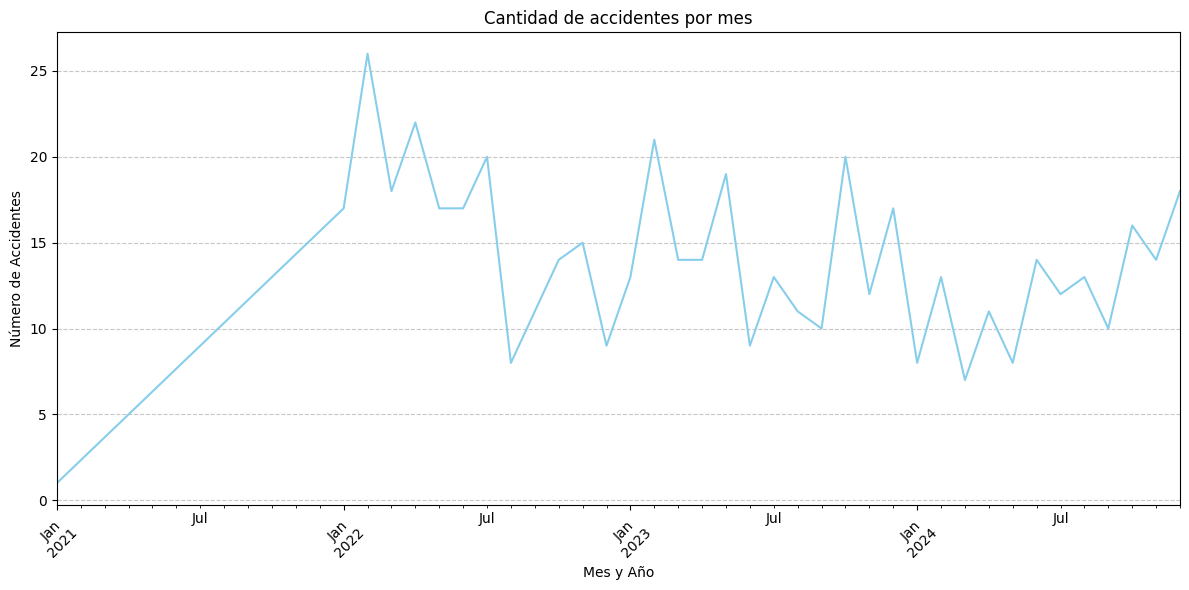

In [457]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
accidentes_por_mes.plot(kind='line', color='skyblue')
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [458]:
#2. GRAFICA
# Contar la frecuencia de cada clase de accidente
clases_accidente = df['Clase_Accidente'].value_counts()

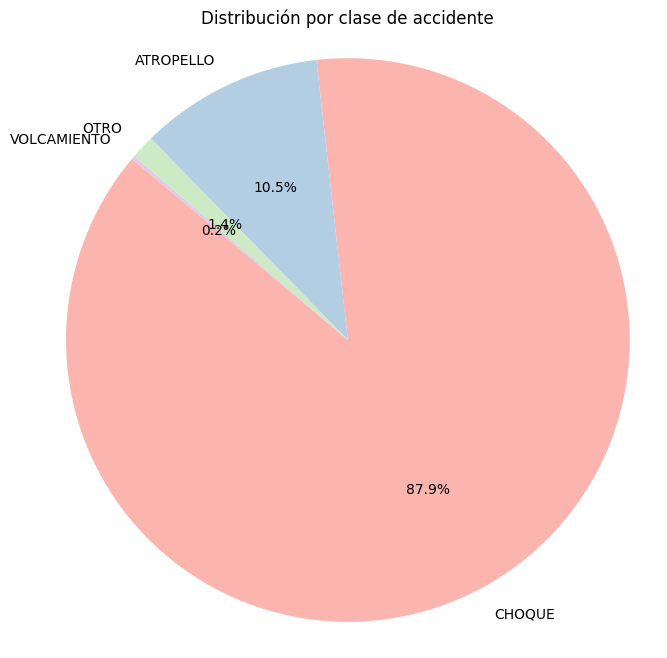

In [459]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clases_accidente,
        labels=clases_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [460]:
# Contar la cantidad de accidentes por barrio
accidentes_por_barrio = df['Barrio'].value_counts().head(10)  # Muestra solo los 10 barrios con más accidentes

/tmp/ipykernel_3690/1388281603.py:9: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


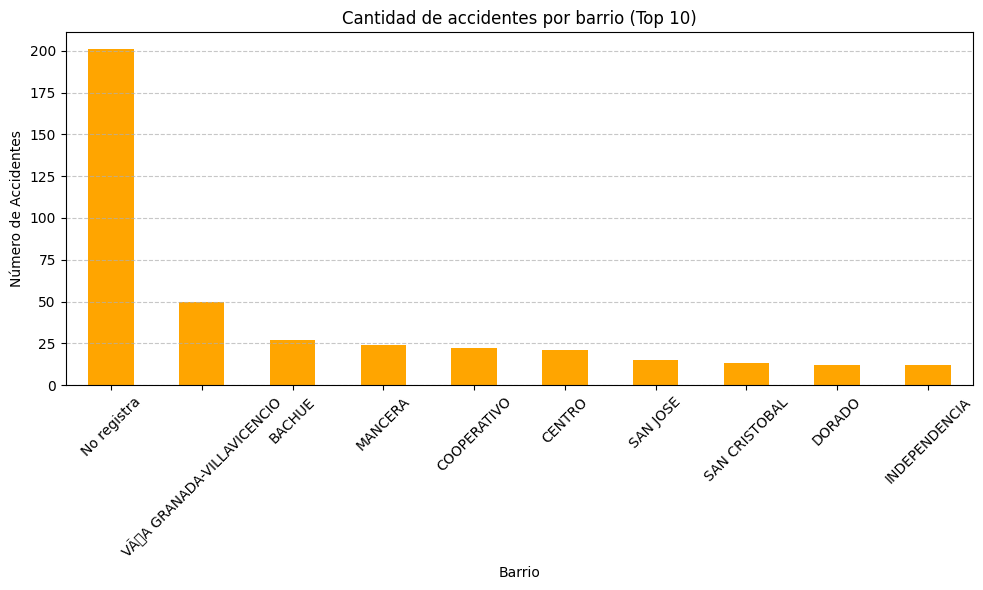

In [461]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_barrio.plot(kind='bar', color='orange')
plt.title('Cantidad de accidentes por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [462]:
# Asegurar que la columna 'Heridos' esté en formato numérico
df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce')

In [463]:
# Calcular el promedio de heridos por clase de accidente
promedio_heridos = df.groupby('Clase_Accidente')['Heridos'].mean().sort_values()

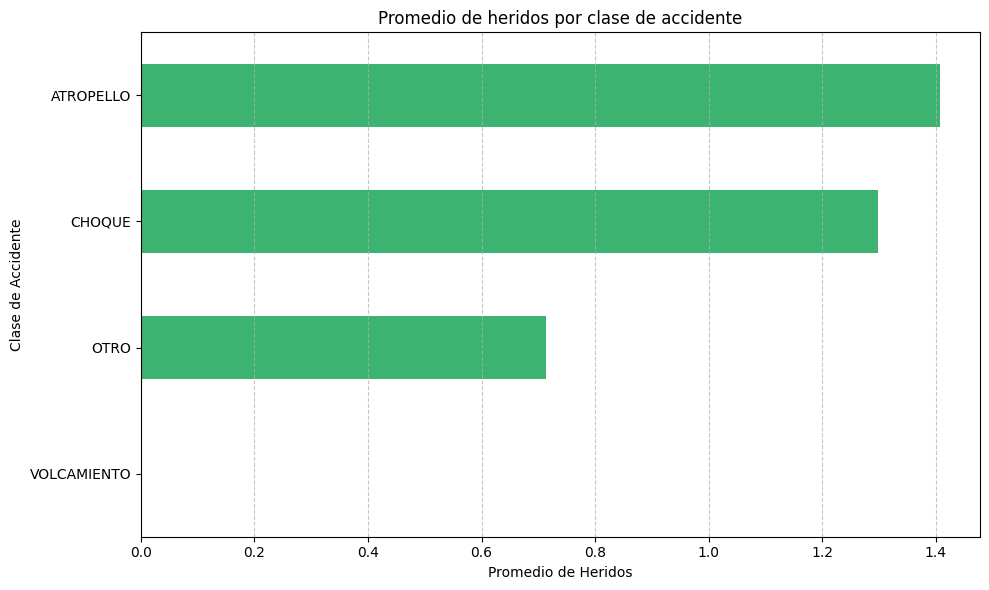

In [464]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
promedio_heridos.plot(kind='barh', color='mediumseagreen')
plt.title('Promedio de heridos por clase de accidente')
plt.xlabel('Promedio de Heridos')
plt.ylabel('Clase de Accidente')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [465]:
#libreria para limpieza de datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [466]:
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO ', 'Muertes', 'Clase_Accidente', 'Mes_Año']


In [467]:
# Asegurarte de que las columnas existan y no tengan espacios
df_raw = pd.read_csv('/workspaces/proyecto1/datos/Accidentes_Viales_final.csv', encoding='ISO-8859-1')
df_raw.columns = df_raw.columns.str.strip()

In [468]:
df_raw.columns = df_raw.columns.str.strip()

In [469]:

# Replace non-numeric values with 0
df_raw["Heridos"] = df_raw["Heridos"].replace('NO APLICA', 0)
df_raw["Muertes"] = df_raw["Muertes"].replace('NO APLICA', 0)

# Ensure columns are integers
df_raw["Heridos"] = df_raw["Heridos"].astype(int)
df_raw["Muertes"] = df_raw["Muertes"].astype(int)

# Define the function
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    elif row["Heridos"] > 1 and row["Muertes"] > 1:
        return "Grave"
    else:
        return "Grave"

# Apply the function
df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)

# Check the data
df_raw.head()



,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente,Tipo_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,Grave
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,Grave
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,Medio
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,Grave
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,Medio


In [470]:
# Usa las variables X_train y X_test ya preparadas en el notebook
# Si necesitas escalar, elimina columnas period/datetime antes de usar MinMaxScaler

cols_to_scale = X_train.select_dtypes(include=['number', 'bool']).columns
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Ahora puedes usar X_train_scaled y X_test_scaled para modelar


In [471]:
# Aplicar la función fila por fila
df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)
df_raw.head()


,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente,Tipo_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,Grave
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,Grave
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,Medio
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,Grave
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,Medio


In [472]:
#definiendo los modelos de acuerdo a los Datos
X = df_raw[["Heridos", "Muertes", "Clase_Accidente"]]
y = df_raw["Tipo_Accidente"]

In [473]:
# 7. Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

In [474]:
# 8. Definir el preprocesamiento automático
preprocesador = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), num_cols),
    ("cat", Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)])

In [475]:
# 9. Crear pipeline del modelo
#hacer pasosconsecutivos
modelo = Pipeline(steps=[
    ("prep", preprocesador),
    ("logreg", LogisticRegression(max_iter=200))])

In [476]:
#mostras en pantalla 
print("Número de filas en X:", X.shape[0])
print("Columnas:", X.columns.tolist())
print("Primeras filas:")
print(X.head())

Número de filas en X: 512
Columnas: ['Heridos', 'Muertes', 'Clase_Accidente']
Primeras filas:
   Heridos  Muertes Clase_Accidente
0        2        0          CHOQUE
1        3        0          CHOQUE
2        1        0          CHOQUE
3        2        0          CHOQUE
4        1        0          CHOQUE


In [477]:
df_model = df_raw[["Heridos", "Muertes", "Clase_Accidente"]].dropna()
print("Filas válidas para modelar:", len(df_model))


Filas válidas para modelar: 512


In [478]:
print(df_raw.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO', 'Muertes', 'Clase_Accidente', 'Tipo_Accidente']


In [479]:
# Elimina espacios iniciales y finales
df_raw.columns = df_raw.columns.str.strip() 

In [480]:
# 2. Reemplazar 'NO APLICA' por 0 en la columna Muertes
df_raw["Muertes"] = df_raw["Muertes"].replace("NO APLICA", 0)

In [481]:
# 3. Convertir 'Heridos' y 'Muertes' a enteros (maneja errores)
df_raw["Muertes"] = pd.to_numeric(df_raw["Muertes"], errors="coerce").fillna(0).astype(int)
df_raw["Heridos"] = pd.to_numeric(df_raw["Heridos"], errors="coerce").fillna(0).astype(int)

In [482]:
if "Tipo_Accidente" not in df_raw.columns:
    df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)

In [483]:
# 4. Crear columna Clasificar_Accidente si no existe
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    else:
        return "Grave"

In [484]:
# 5. Eliminar filas con nulos en columnas clave
df_limpio = df_raw.dropna(subset=["Heridos", "Muertes", "Tipo_Accidente"])

In [485]:
# 6. Variables predictoras y objetivo
X = df_limpio[["Heridos", "Muertes"]]  # ✅ Lista de strings
y = df_limpio["Tipo_Accidente"]

In [486]:
# 7. Separar en entrenamiento y prueba, con estratificación
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [488]:
# 8. Entrenar modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [489]:
# 9. Predecir y evaluar
from sklearn.metrics import accuracy_score, classification_report

In [490]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [491]:

print("Accuracy del modelo:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy del modelo: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

       Grave       1.00      1.00      1.00        45
        Leve       1.00      1.00      1.00        13
       Medio       1.00      1.00      1.00        45

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [492]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [493]:
# 10. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Leve", "Medio", "Grave"])

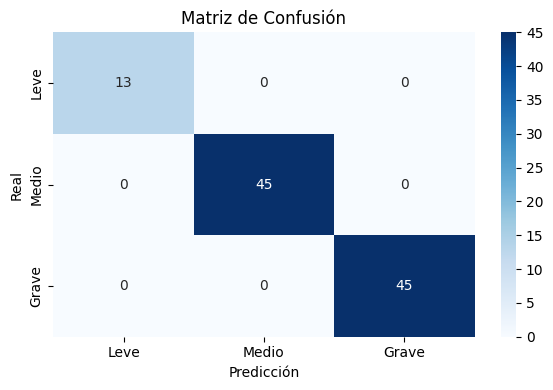

In [494]:
# 11. Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Leve", "Medio", "Grave"], yticklabels=["Leve", "Medio", "Grave"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

In [495]:
#EVAULACION DEL MODELO ANTES DE LIMPIAR LOS DATOS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Correct the definition of variables_modelo
variables_modelo = ['Heridos _SI/NO', 'Tipo_Accidente']

# Prepare the data
# Use the correct columns for Xb and yb
Xb = df_raw[['Clase_Accidente']]
yb = df_raw['Tipo_Accidente']

# Convert categorical variables to dummy variables
Xb = pd.get_dummies(Xb, drop_first=True)

# Split the data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Train the logistic regression model
model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

# Predict and calculate accuracy
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))


✅ Exactitud antes de la limpieza: 0.466


In [496]:
#PREPARACION DATOS: LIEMPIEZA, CODIFICACION Y IMPUTACION
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_raw.copy()

# Imputación
imputer_edad = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_edad.fit_transform(df_clean[['Heridos']])

imputer_ingreso = SimpleImputer(strategy='mean')
df_clean['Muertes'] = imputer_ingreso.fit_transform(df_clean[['Muertes']])

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Codigo_Accidente', 'Direccion', 'Barrio','Accidente _con','Clase_Accidente'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['Heridos','Muertes']] = scaler.fit_transform(df_clean[['Heridos','Muertes']])

In [497]:
print(df_clean.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Vehiculos_Involucrados', 'Heridos', 'Heridos _SI/NO', 'Muertes', 'Tipo_Accidente', 'Codigo_Accidente_A0001602284', 'Codigo_Accidente_A0001602285', 'Codigo_Accidente_A0001602287', 'Codigo_Accidente_A0001651928', 'Codigo_Accidente_A0001651929', 'Codigo_Accidente_A0001651930', 'Codigo_Accidente_A0001651931', 'Codigo_Accidente_A001371865', 'Codigo_Accidente_A001371866', 'Codigo_Accidente_A001371867', 'Codigo_Accidente_A001371868', 'Codigo_Accidente_A001371869', 'Codigo_Accidente_A001371870', 'Codigo_Accidente_A001371871', 'Codigo_Accidente_A001371872', 'Codigo_Accidente_A001371873', 'Codigo_Accidente_A001371874', 'Codigo_Accidente_A001371875', 'Codigo_Accidente_A001371876', 'Codigo_Accidente_A001371877', 'Codigo_Accidente_A001371878', 'Codigo_Accidente_A001371879', 'Codigo_Accidente_A001371880', 'Codigo_Accidente_A001371881', 'Codigo_Accidente_A001371882', 'Codigo_Accidente_A001371883', 'Codigo_Accidente_A001371884', 'Codigo_Accidente_A001371885', 'Codigo_Accide

In [498]:
df_clean.head()

,ID,Fecha_Ocurrencia,Vehiculos_Involucrados,Heridos,Heridos _SI/NO,Muertes,Tipo_Accidente,Codigo_Accidente_A0001602284,Codigo_Accidente_A0001602285,Codigo_Accidente_A0001602287,...,Barrio_VÃA ACACÃAS-GUAMAL,Barrio_VÃA ACACÃAS-VILLAVICENCIO,Barrio_VÃA ANTIGUA GUAMAL,Barrio_VÃA GRANADA-VILLAVICENCIO,Barrio_VÃA PRINCIPAL-AVENIDA 23,Accidente _con_HERIDOS,Accidente _con_MUERTOS,Clase_Accidente_CHOQUE,Clase_Accidente_OTRO,Clase_Accidente_VOLCAMIENTO
0,1,1/3/2024 0:00,2,0.4,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2,1/6/2024 0:00,2,0.6,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,3,1/9/2024 0:00,1,0.2,1,0.0,Medio,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,4,1/12/2024 0:00,2,0.4,1,0.0,Grave,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,5,1/12/2024 0:00,2,0.2,1,0.0,Medio,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [499]:
#EVAULACION DESPUES DEL MODELO DE LA LIMPIEZA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_clean is already defined and cleaned
# Drop columns that are not needed for the model
Xc = df_clean[['Clase_Accidente_CHOQUE', 'Clase_Accidente_OTRO', 'Clase_Accidente_VOLCAMIENTO']]
yc = df_clean['Tipo_Accidente']

# No need to use get_dummies, as columns are already dummy variables

# Split the data into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Train the logistic regression model
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Predict and calculate accuracy
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


✅ Exactitud después de la limpieza: 0.5


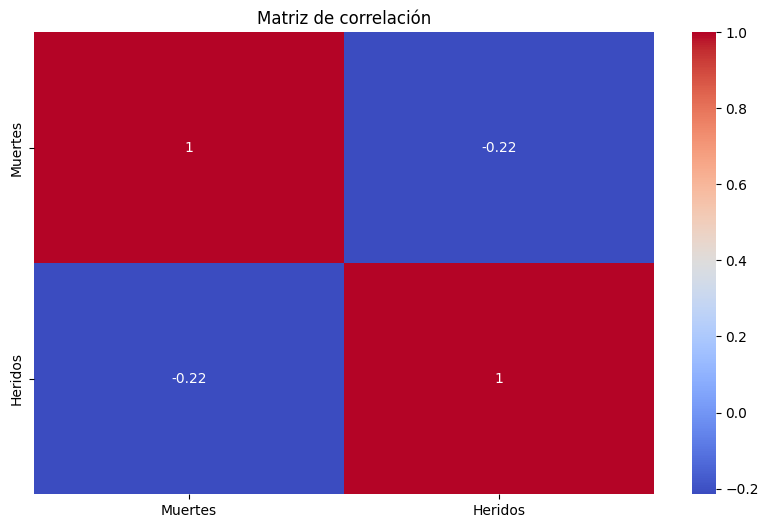

In [500]:
# Mapa de calor de correlaciones numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Mapping string values to numeric ones
df_clean['Tipo_Accidente'] = df_clean['Tipo_Accidente'].map({'Leve': 1, 'Moderado': 2, 'Grave': 3})

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[['Muertes', 'Heridos']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [501]:
#PREDICIONES DE LA PROBABILIDAD DE OCURRENCIA 
#MODELO DE REGRESION LOGISTICA
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')

In [502]:
# Ver los nombres exactos de las columnas
print(df.columns)

Index(['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio',
       'Vehiculos_Involucrados', 'Heridos', 'Accidente _con',
       'Heridos _SI/NO ', 'Muertes', 'Clase_Accidente'],
      dtype='object')


In [503]:
print(X.columns)

Index(['Heridos', 'Muertes'], dtype='object')


In [504]:
#SELECCION Y PREPARACION DE DATOS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Check if 'Tipo_Accidente' exists in the DataFrame
if 'Tipo_Accidente' in df.columns:
    X = df.drop(columns=['Heridos', 'Muertes', 'Tipo_Accidente'])
    y = df['Tipo_Accidente']
else:
    print("Column 'Tipo_Accidente' not found in DataFrame.")
    # Handle the case where the column is missing
    X = df.drop(columns=['Heridos', 'Muertes'])
    y = None
    # or handle appropriately

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    print("Cannot proceed with train-test split as 'Tipo_Accidente' column is missing.")


Column 'Tipo_Accidente' not found in DataFrame.
Cannot proceed with train-test split as 'Tipo_Accidente' column is missing.


In [505]:
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE


In [506]:
print(df_clean['Tipo_Accidente'].value_counts())

Tipo_Accidente
3.0    223
1.0     64
Name: count, dtype: int64


In [507]:

import numpy as np

# Create a synthetic target variable with two classes
df['Tipo_Accidente'] = np.random.choice(['Leve', 'Grave'], size=len(df))

X = df.drop(columns=['Heridos', 'Muertes', 'Tipo_Accidente'])
y = df['Tipo_Accidente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [508]:
#ENTRENAMIENTO SIN MANEJO DEL DESBALANCE
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [509]:
# EVALUACION DEL MODELO (FALLIDO)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nDistribución de predicciones:")
print(np.unique(y_pred, return_counts=True))

Reporte de clasificación:
              precision    recall  f1-score   support

       Grave       0.50      0.74      0.60        77
        Leve       0.51      0.27      0.36        77

    accuracy                           0.51       154
   macro avg       0.51      0.51      0.48       154
weighted avg       0.51      0.51      0.48       154


Distribución de predicciones:
(array(['Grave', 'Leve'], dtype=object), array([113,  41]))


In [510]:
#CORRECION CON CLASS_WEIGHT
model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, y_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

       Grave       0.52      0.64      0.57        77
        Leve       0.53      0.42      0.47        77

    accuracy                           0.53       154
   macro avg       0.53      0.53      0.52       154
weighted avg       0.53      0.53      0.52       154



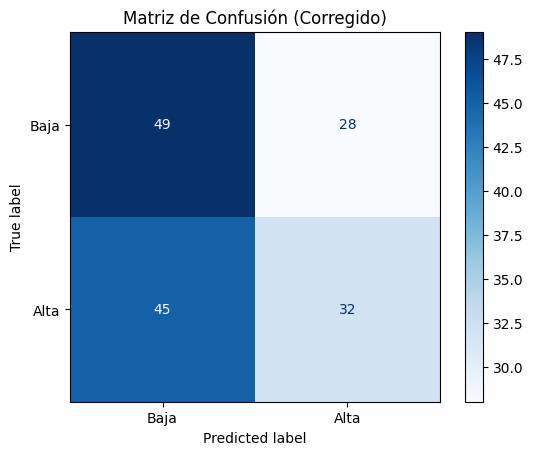

In [511]:
#EVAULACION DEL MODELO CORREGIDO
print("Reporte de clasificación (modelo corregido):")
print(classification_report(y_test, y_pred_corr, zero_division=0))

cm = confusion_matrix(y_test, y_pred_corr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja", "Alta"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

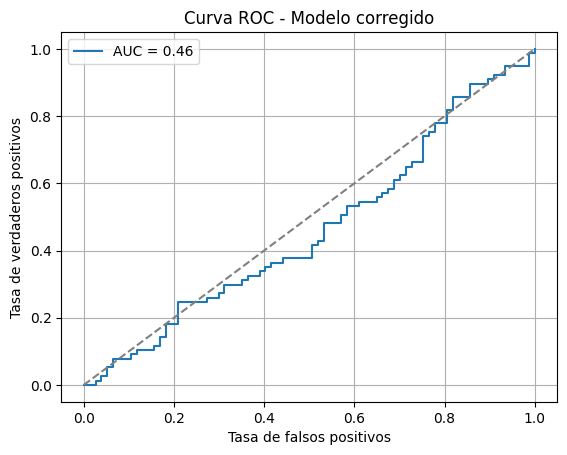

In [512]:

#CURVA ROC DEL MODELO CORREGIDO
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert target variable to numeric values
y_test_numeric = y_test.map({'Leve': 0, 'Grave': 1})

fpr, tpr, _ = roc_curve(y_test_numeric, y_prob_corr)
auc = roc_auc_score(y_test_numeric, y_prob_corr)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Modelo corregido")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#COMPARACION DE MODELOS

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [518]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=300),
    
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")

KNN: Exactitud promedio (cross-val): 0.500 ± 0.058
Regresión Logística: Exactitud promedio (cross-val): 0.553 ± 0.054
